This is a homework for Topic 2 of MLCourse.ai

https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data

In [72]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

You should consider upgrading via the 'd:\projects\olimps\python\venv\scripts\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'd:\projects\olimps\python\venv\scripts\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'd:\projects\olimps\python\venv\scripts\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'd:\projects\olimps\python\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [73]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Matplotlib forms basis for visualization in Python
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [74]:
sns.set_context(
    "notebook",
    font_scale=1.5,
    rc={
        "figure.figsize": (11, 8),
        "axes.titlesize": 18
    }
)

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

In [75]:
data = pd.read_csv('../data/mlbootcamp5_train.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


1    45530
2    24470
Name: gender, dtype: int64


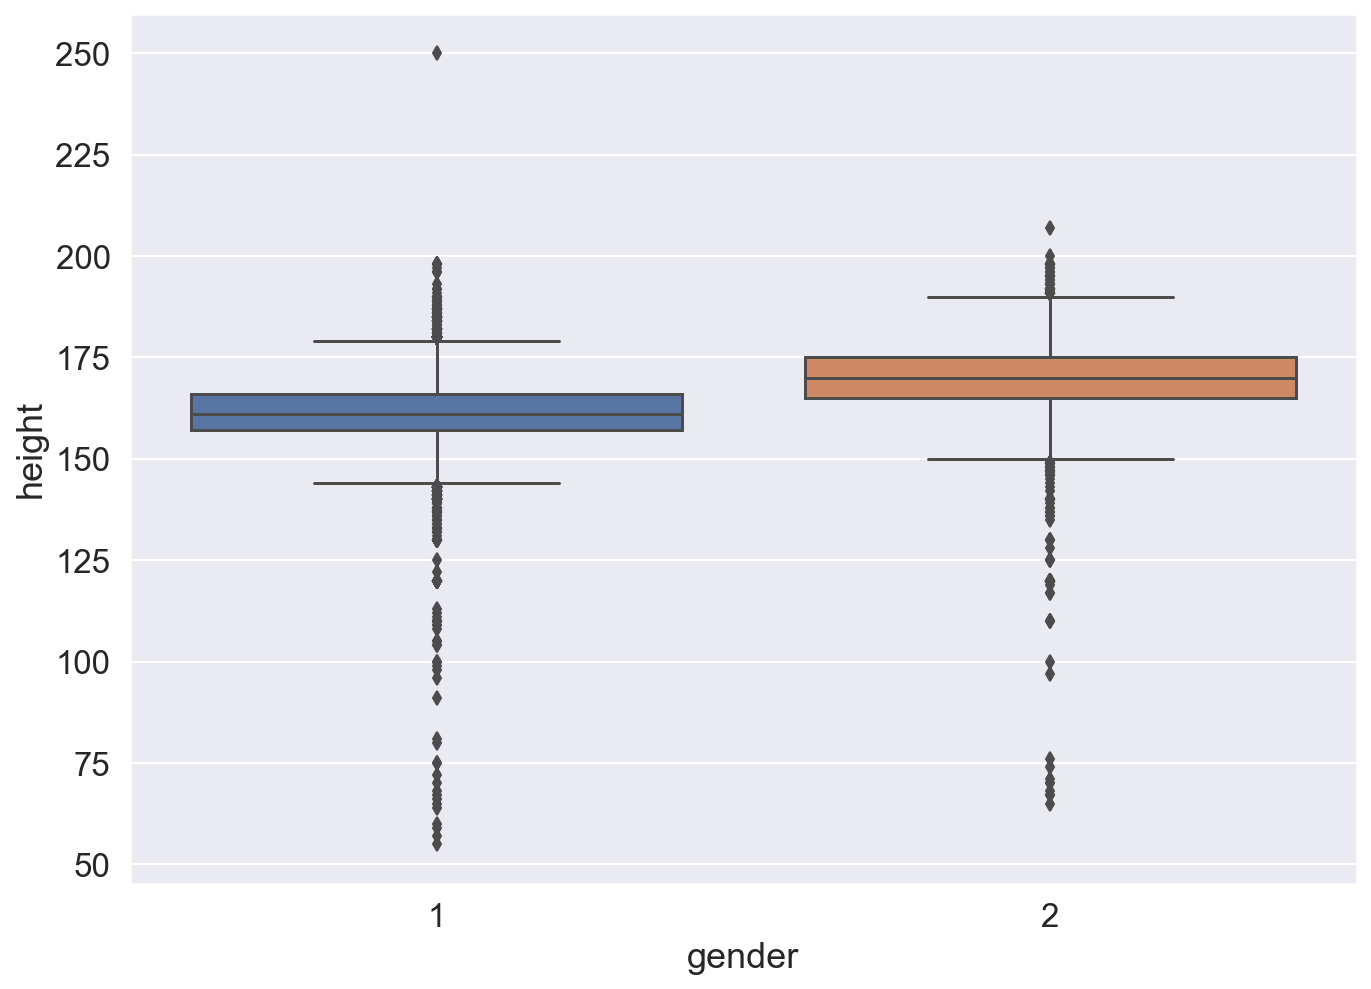

In [76]:
sns.boxplot(x='gender', y='height', data=data)
print(data['gender'].value_counts())

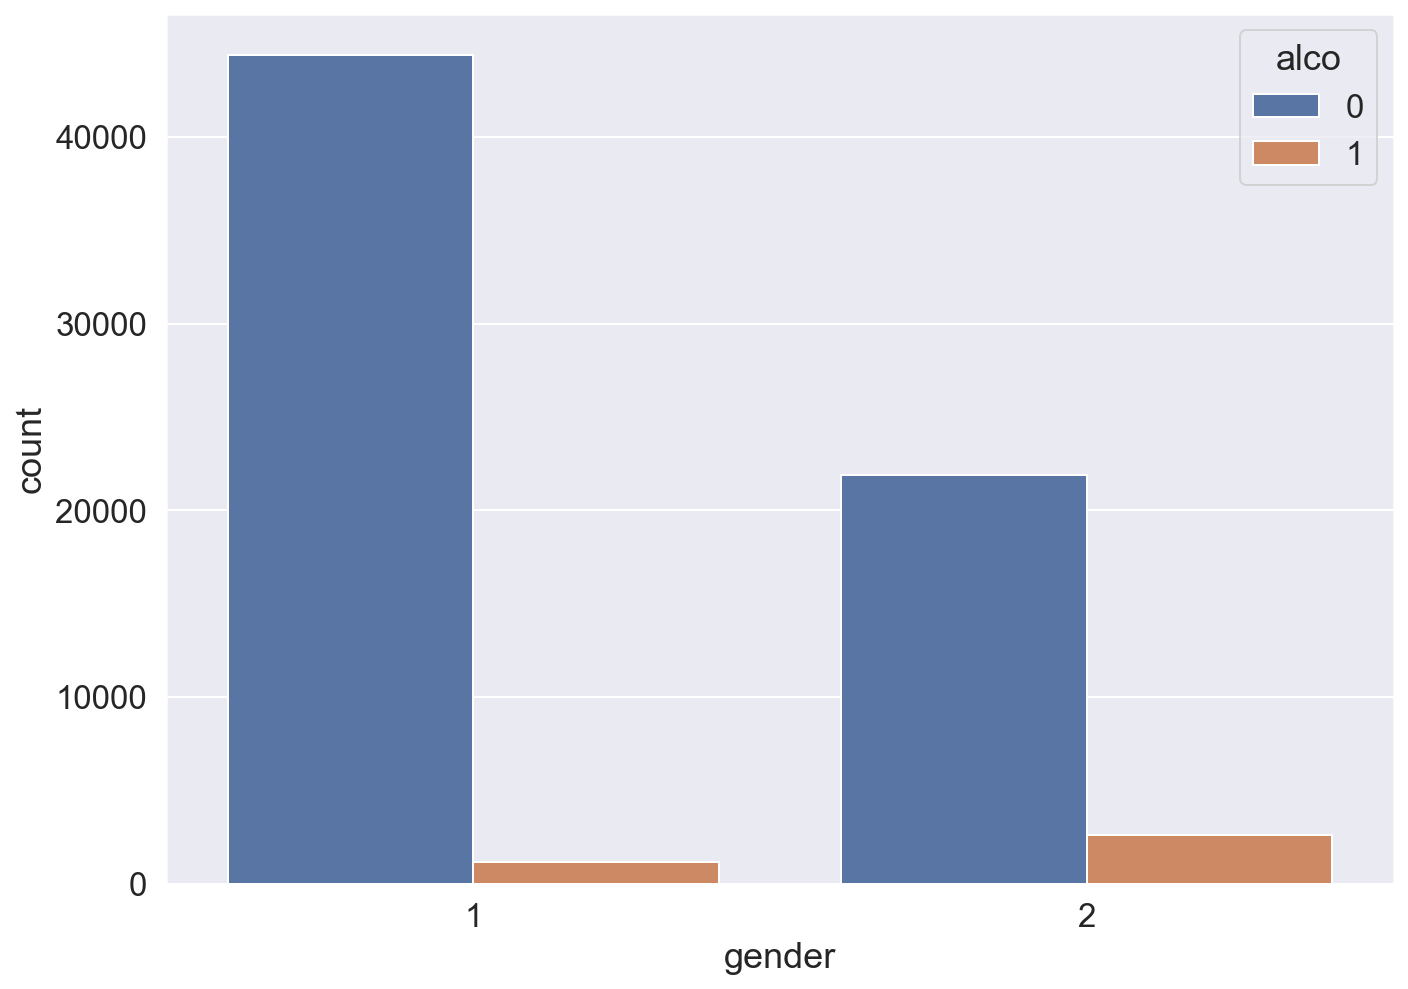

In [77]:
sns.countplot(x='gender', hue='alco', data=data);

0.20102390309976736


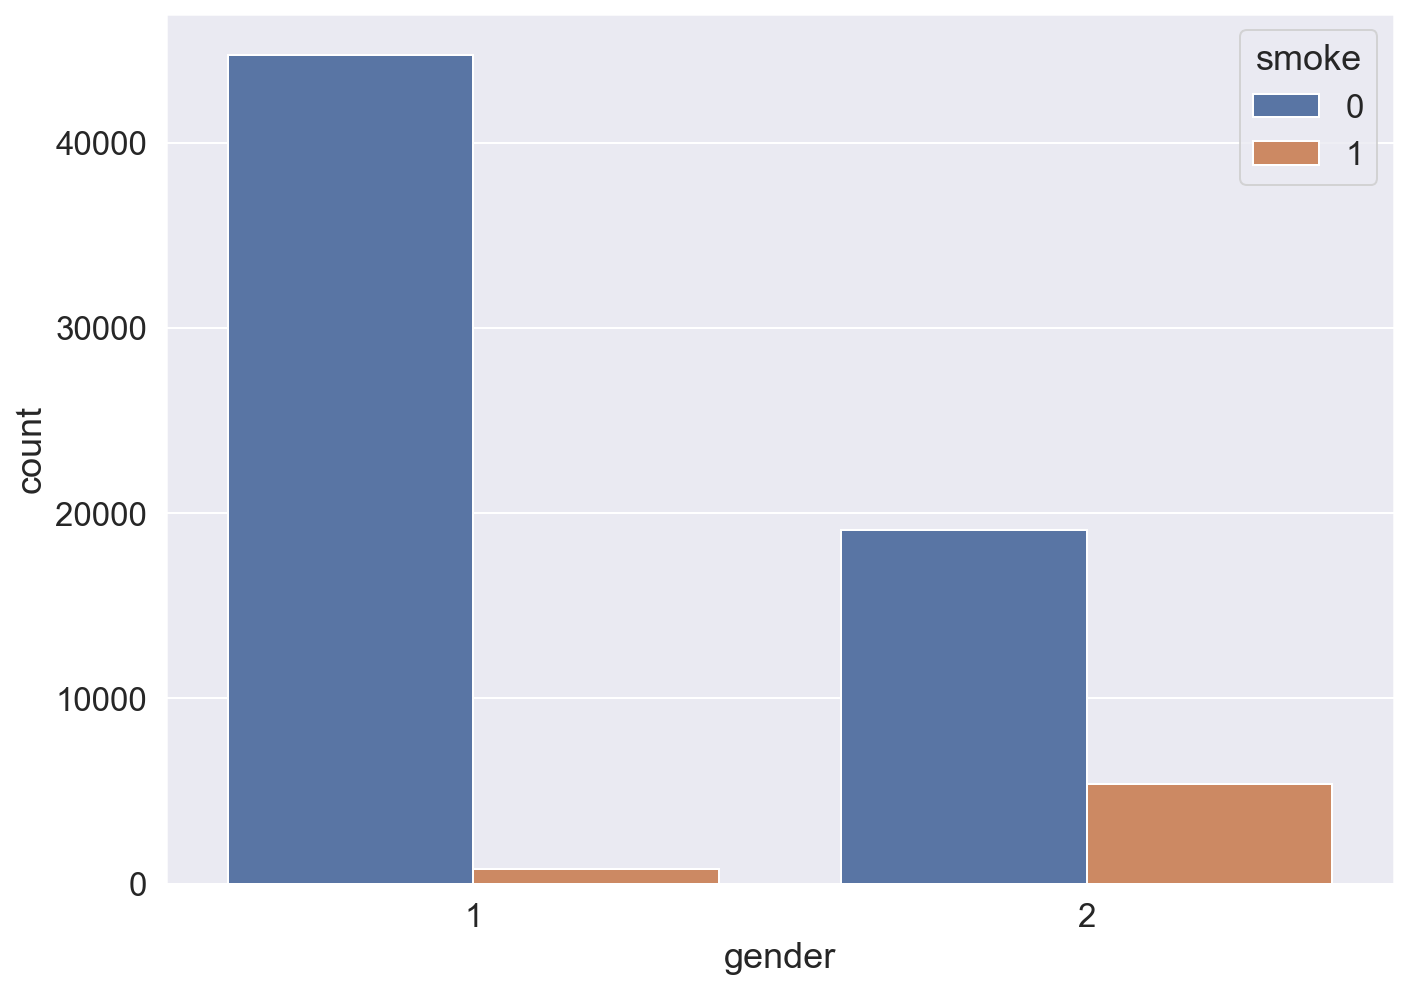

In [78]:
sns.countplot(x='gender', hue='smoke', data=data);
print(data[data['gender'] == 2]['smoke'].mean() - data[data['gender'] == 1]['smoke'].mean())

-597.0


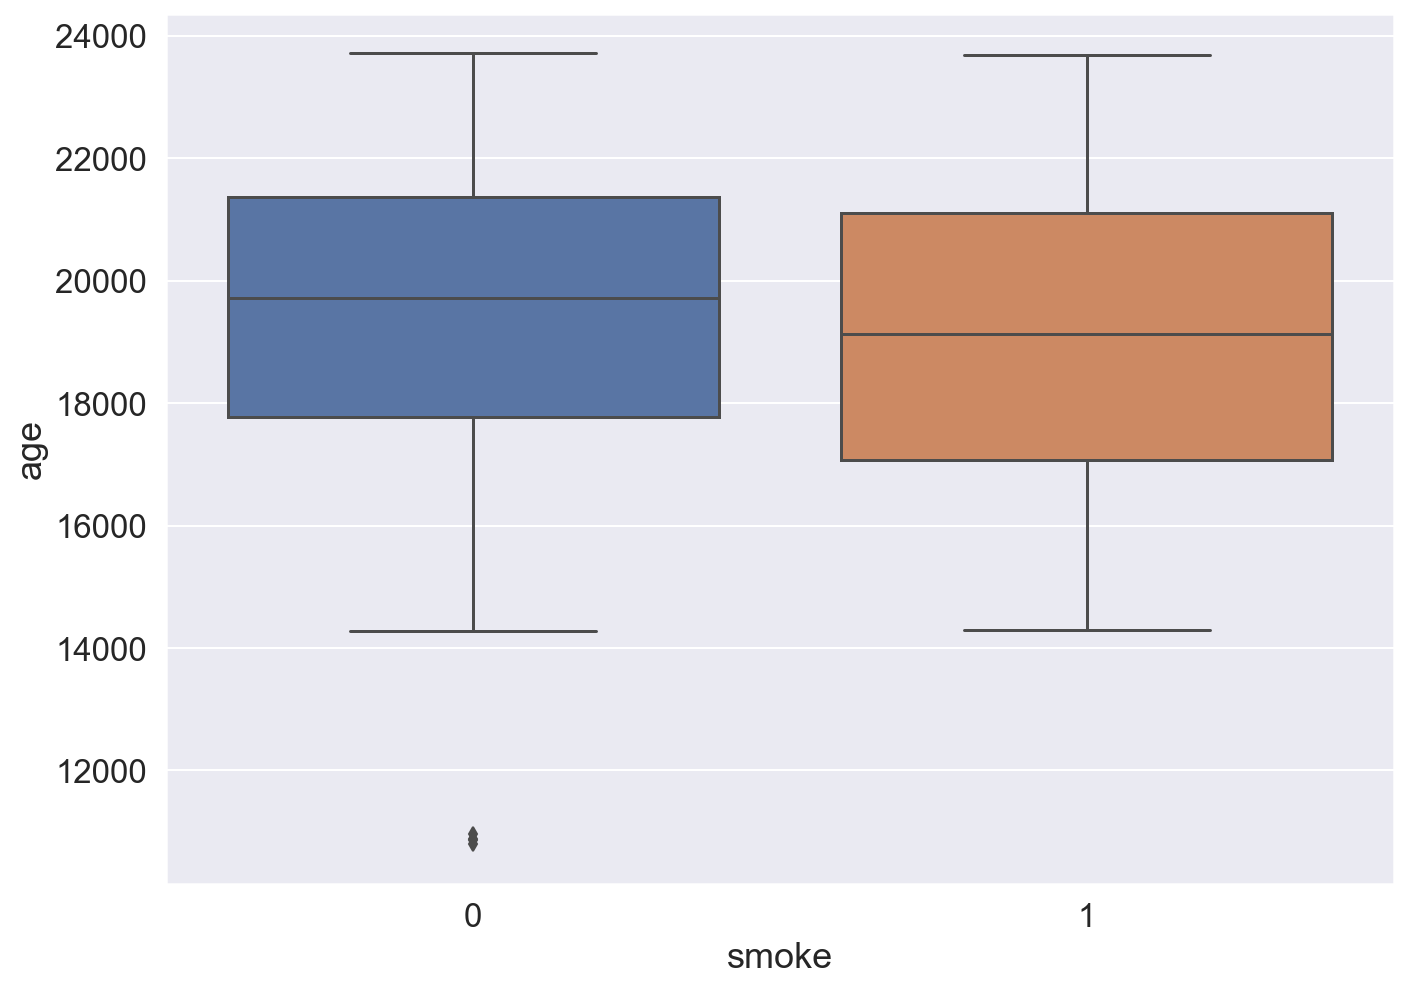

In [79]:
sns.boxplot(x='smoke', y='age', data=data);
print(data[data['smoke'] == 1]['age'].median() - data[data['smoke'] == 0]['age'].median())

In [80]:
if len(str(round(data['age'].mean()))) > 2:
    data['age'] = data['age'].map(lambda x: round(x / 365))

In [88]:
# Clean data
# data.drop(data[~data['cholesterol'].isin((1, 2, 3))].index, inplace=True)

old_people = data[data['age'] >= 60][data['age'] <= 64]

print(len(old_people[old_people['cholesterol'] == 1][old_people['ap_hi'] < 120].index))
print(len(old_people[old_people['cholesterol'] == 3][old_people['ap_hi'] >= 160][old_people['ap_hi'] < 180].index))

1299
302


26.374068120774975
1.233141084543501
2.0178854202208463
M:  25.872638075460163
F:  26.845406594131507


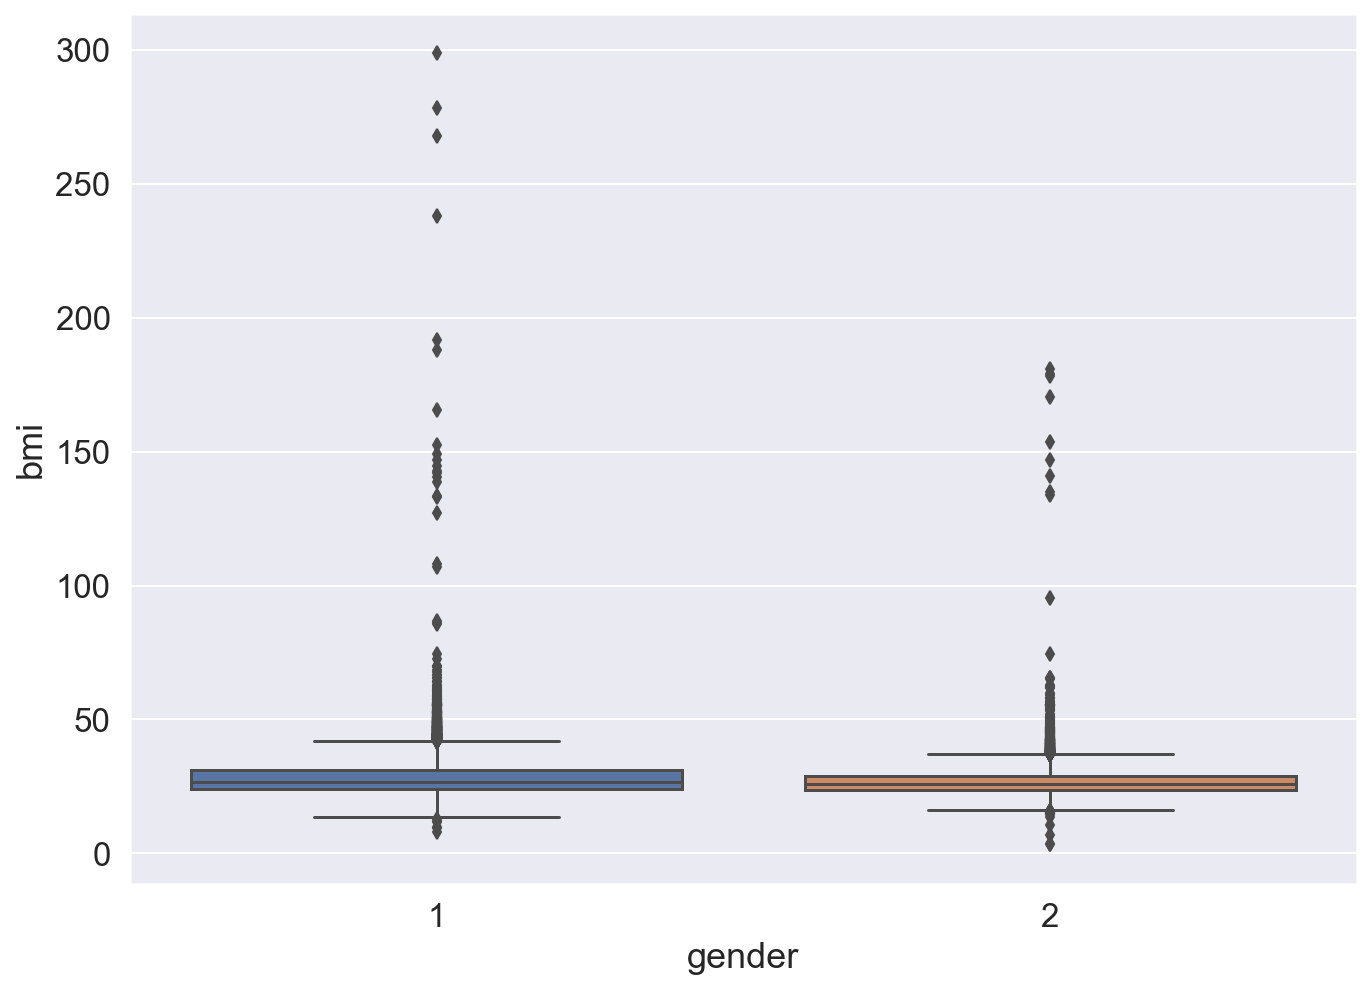

In [96]:
data['bmi'] = data['weight'] / data['height'].apply(lambda x: x * x / 10000)
print(data['bmi'].median())
print(data[data['gender'] == 1]['bmi'].mean() - data[data['gender'] == 2]['bmi'].mean())
print(data[data['cardio'] == 1]['bmi'].mean() - data[data['cardio'] == 0]['bmi'].mean())

hnd = data[data['cardio'] == 0][data['alco'] == 0]
print('M: ', hnd[hnd['gender'] == 2]['bmi'].mean())
print('F: ', hnd[hnd['gender'] == 1]['bmi'].mean())

sns.boxplot(x='gender', y='bmi', data=data);

In [98]:
print(len(data.index))

data.drop(data[data['ap_lo'] > data['ap_hi']].index, inplace=True)
data.drop(data[data['height'] < data['height'].quantile(0.025)].index, inplace=True)
data.drop(data[data['height'] > data['height'].quantile(0.975)].index, inplace=True)
data.drop(data[data['weight'] < data['weight'].quantile(0.025)].index, inplace=True)
data.drop(data[data['weight'] > data['weight'].quantile(0.975)].index, inplace=True)

print(len(data.index))

70000
62784


In [116]:
# sns.heatmap(data.corr(method='pearson'));
data.corr(method='pearson')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,1.000000,0.002286,0.004106,0.000221,0.000144,0.003489,0.000429,0.005635,0.002383,-0.002403,-0.001039,0.005890,0.003770,0.000050
age,0.002286,1.000000,-0.018663,-0.077490,0.069573,0.018515,0.152765,0.154100,0.097856,-0.044350,-0.027159,-0.011318,0.239551,0.110254
gender,0.004106,-0.018663,1.000000,0.505389,0.130331,0.004941,0.059294,-0.038788,-0.022953,0.338104,0.169430,0.007628,0.001755,-0.138789
height,0.000221,-0.077490,0.505389,1.000000,0.248868,0.004300,0.015356,-0.067118,-0.029119,0.187389,0.089257,-0.005042,-0.025673,-0.276587
weight,0.000144,0.069573,0.130331,0.248868,1.000000,0.026527,0.223786,0.133912,0.091551,0.055805,0.058286,-0.012112,0.166886,0.858664
ap_hi,0.003489,0.018515,0.004941,0.004300,0.026527,1.000000,0.072260,0.021282,0.010119,-0.001978,0.000607,-0.000162,0.050321,0.024453
ap_lo,0.000429,0.152765,0.059294,0.015356,0.223786,0.072260,1.000000,0.152698,0.066235,0.022997,0.031839,0.002184,0.326125,0.213072
cholesterol,0.005635,0.154100,-0.038788,-0.067118,0.133912,0.021282,0.152698,1.000000,0.451908,0.005769,0.030090,0.007712,0.217927,0.167674
gluc,0.002383,0.097856,-0.022953,-0.029119,0.091551,0.010119,0.066235,0.451908,1.000000,-0.010409,0.005317,-0.007182,0.087316,0.105794
smoke,-0.002403,-0.044350,0.338104,0.187389,0.055805,-0.001978,0.022997,0.005769,-0.010409,1.000000,0.341434,0.027203,-0.020605,-0.043446


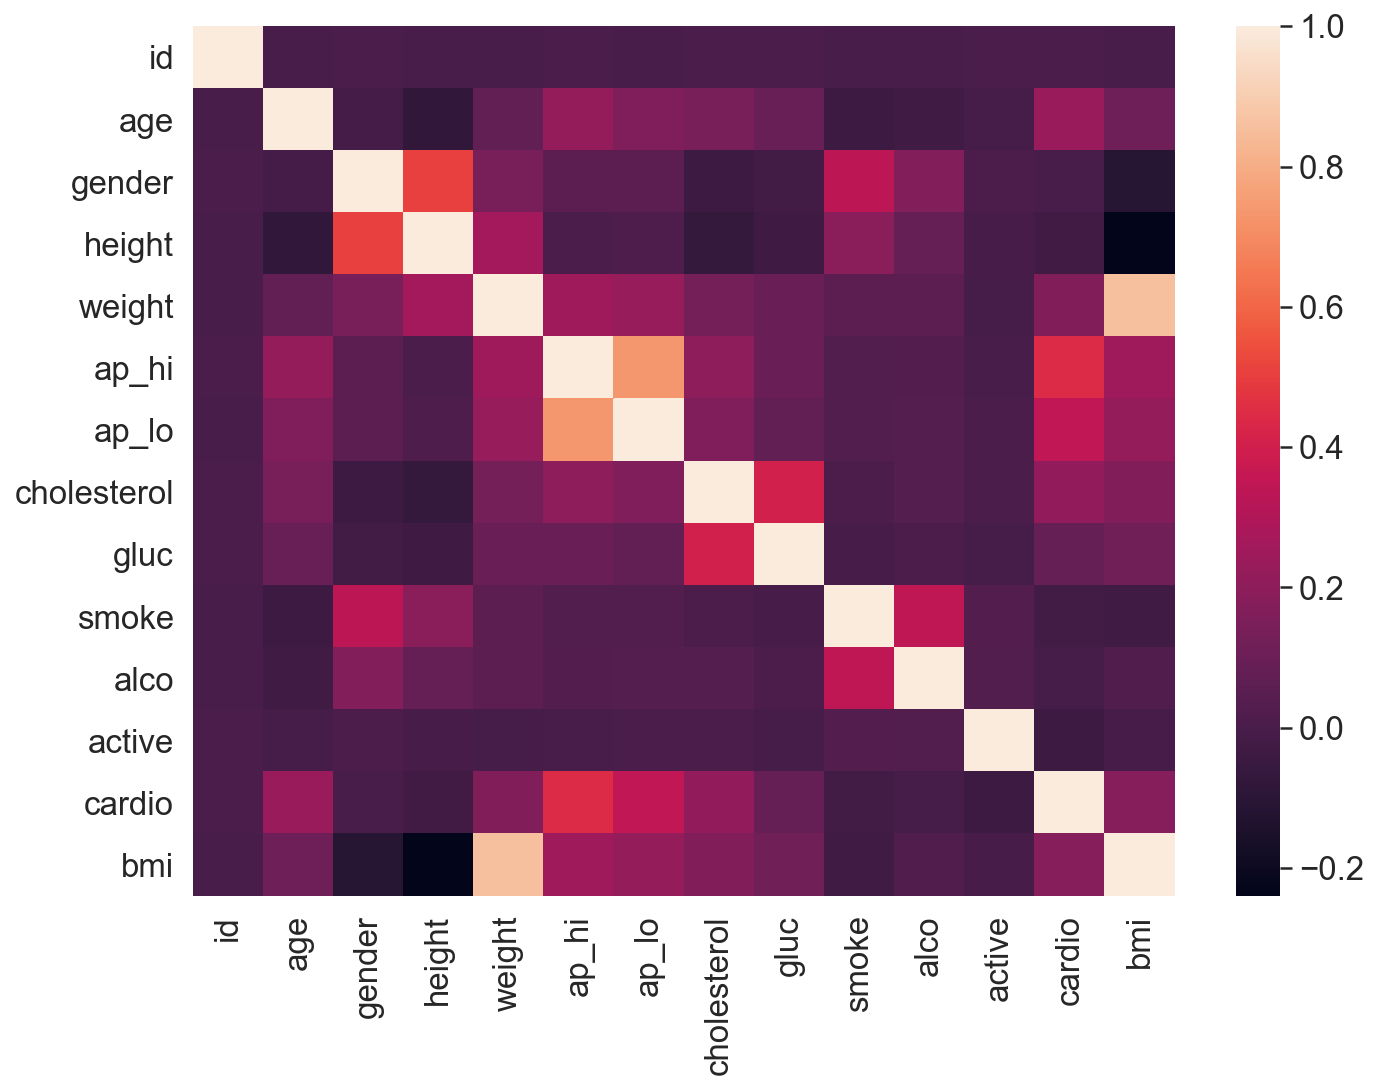

In [108]:
melted = data.melt(id_vars='id')
sns.heatmap(data.corr(method='spearman'));

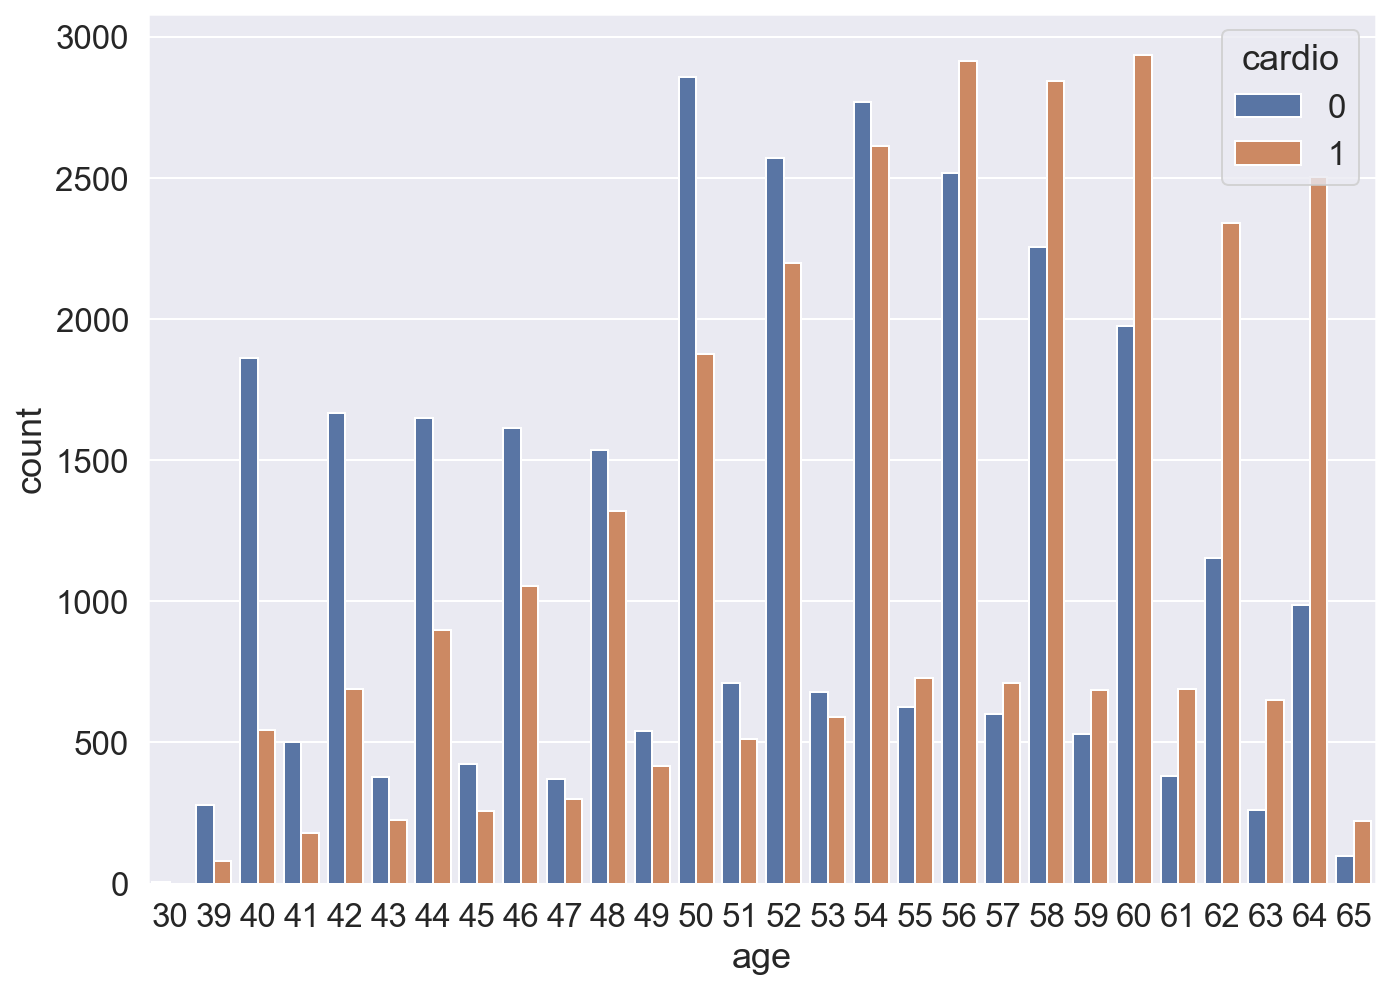

In [115]:
sns.countplot(x='age', hue='cardio', data=data);